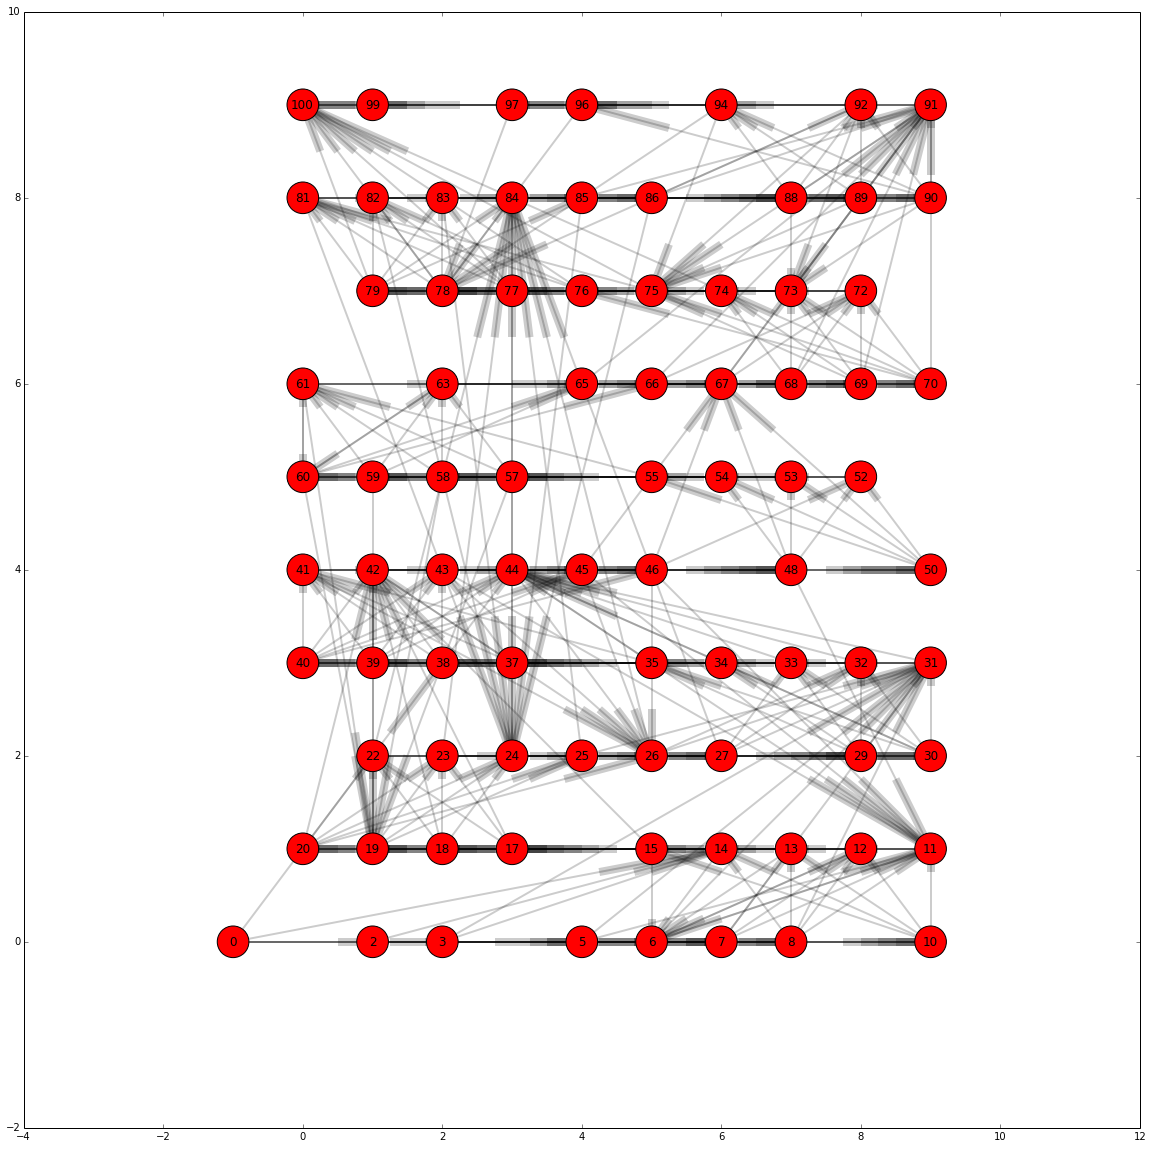

In [68]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# set up the game board
CHUTES = [
    (16, 6),
    (47, 26),
    (49, 11),
    (56, 53),
    (62, 19),
    (64, 60),
    (87, 24),
    (93, 73),
    (95, 75),
    (98, 78),
]
LADDERS = [
    (1, 38),
    (4, 14),
    (9, 31),
    (21, 42),
    (28, 84),
    (36, 44),
    (51, 67),
    (71, 91),
    (80, 100),
]
chutes_and_ladders = dict(CHUTES + LADDERS)

nodes = set(range(0, 101, 1)) - set(chutes_and_ladders)
edges = {}
for node in nodes:
    edges[node] = {chutes_and_ladders.get(node + i, node + i) for i in xrange(1, min(7, 101 - node))}

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(k, n) for k, v in edges.items() for n in v])

pos = {}
for node in G.nodes_iter():
    pos[node] = (
        (node - 1) % 10 if ((node - 1) / 10) % 2 == 0 else 9 - ((node - 1) % 10),
        (node - 1) / 10
    )
pos[0] = (-1, 0)
    
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, alpha=0.2, width=2)
nx.draw_networkx_labels(G, pos)
fig = plt.gcf()
fig.set_size_inches(20, 20)

In [67]:
# all the way to win the games in 7 moves (7 is fewest possible number of moves)
list(nx.all_shortest_paths(G, 0, 100))

[[0, 38, 39, 45, 67, 68, 74, 100],
 [0, 38, 40, 45, 67, 68, 74, 100],
 [0, 38, 41, 45, 67, 68, 74, 100],
 [0, 38, 42, 45, 67, 68, 74, 100],
 [0, 38, 43, 45, 67, 68, 74, 100],
 [0, 38, 44, 45, 67, 68, 74, 100],
 [0, 38, 40, 46, 67, 68, 74, 100],
 [0, 38, 41, 46, 67, 68, 74, 100],
 [0, 38, 42, 46, 67, 68, 74, 100],
 [0, 38, 43, 46, 67, 68, 74, 100],
 [0, 38, 44, 46, 67, 68, 74, 100],
 [0, 38, 42, 48, 67, 68, 74, 100],
 [0, 38, 43, 48, 67, 68, 74, 100],
 [0, 38, 44, 48, 67, 68, 74, 100],
 [0, 38, 44, 50, 67, 68, 74, 100],
 [0, 38, 39, 45, 67, 69, 74, 100],
 [0, 38, 40, 45, 67, 69, 74, 100],
 [0, 38, 41, 45, 67, 69, 74, 100],
 [0, 38, 42, 45, 67, 69, 74, 100],
 [0, 38, 43, 45, 67, 69, 74, 100],
 [0, 38, 44, 45, 67, 69, 74, 100],
 [0, 38, 40, 46, 67, 69, 74, 100],
 [0, 38, 41, 46, 67, 69, 74, 100],
 [0, 38, 42, 46, 67, 69, 74, 100],
 [0, 38, 43, 46, 67, 69, 74, 100],
 [0, 38, 44, 46, 67, 69, 74, 100],
 [0, 38, 42, 48, 67, 69, 74, 100],
 [0, 38, 43, 48, 67, 69, 74, 100],
 [0, 38, 44, 48, 67,

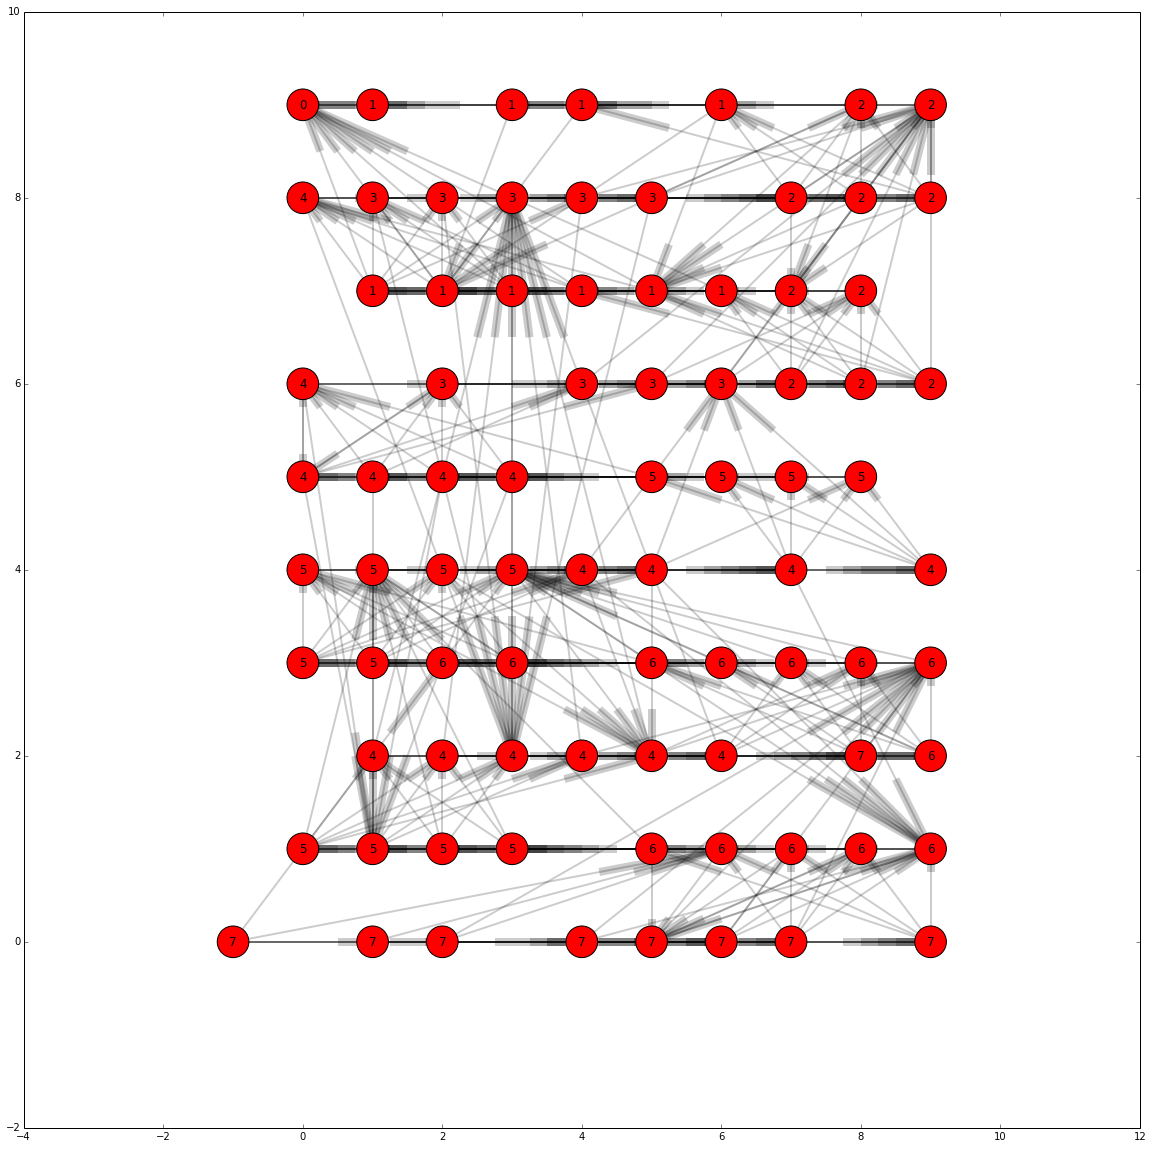

In [71]:
shortest_paths = {n: nx.shortest_path_length(G, n, 100) for n in nodes}
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, alpha=0.2, width=2)
nx.draw_networkx_labels(G, pos, labels=shortest_paths)
fig = plt.gcf()
fig.set_size_inches(20, 20)